<center><h1><b>ASSIGNMENT</b></h1></center>
Consider a solid with heat capacity C and an initial temperature T0. The solid is placed in an environment with temperature T_e, and heat is transferred from the environment to the solid over time. The rate of heat transfer, dQ/dt, can be described by the equation:

$$\frac{dQ}{dt} = -kA \frac{(T - T_{e})}{d}$$

***where k is the thermal conductivity of the solid, A is the surface area, d is the thickness of the solid, and T is the temperature of the solid.***

Use a for loop in Python to solve this equation numerically and determine the temperature T of the solid as a function of time ($t$). The simulation should run from $t=0$ to $t=t_{final}$ with a time step dt, and the initial temperature should be $T_0$.

Calculate the specific heat capacity $C_p$ of the solid by running the simulation for a range of heat inputs and plotting the temperature ($T$) versus the heat input ($Q$). Extract the slope of this plot, which will give you $\frac{C_p}{V}$, where $V$ is the volume of the solid.

***Given the parameters $k=0.1$, $A=1$, $d=0.1$, $T_{e}=300$, $T_0=500$, $dt=0.01$, and $t_{final}=100$.***

<center><h1><b>SOLUTION</b></h1></center>

In [9]:
import numpy as np
from matplotlib import pyplot as plt

# Defining the given parameters

k = 0.1              # thermal conductivity
A = 1                # surface area
d = 0.1              # thickness
T_e = 300            # final temperature
T_0 = 500            # initial temperature
t_n = 0              # initial time
dt = 0.01            # change in time
t_final = 100        # final time

# Declaring a Function to calculate dQ/dt
def heat_rate(T):
    answer = -k * A * (T - T_e) / d
    return answer

# Declaring another Function to solve the differential equation numerically
def differential_eqn():
    T = T_0
    time = np.arange(0, t_final, dt)    # == (0, 100, 0.1) 
    temp_values = []                 # creating an list that will hold temperature values
    for t in time:
        dQdt = heat_rate(T)
        dT = dQdt * dt
        T += dT
        temp_values.append(T)
    return time, temp_values


# Calculate temperature as a function of time
time, temp_values = differential_eqn()


# Calculate heat input Q as a function of time
heat_input = np.cumsum(-np.array(temp_values[1:]) * dt * k * A / d)


# Calculate specific heat capacity Cp/V

slope, _ = np.polyfit(heat_input, temp_values[1:], 1)
Cp_V = slope
print("Specific heat capacity Cp/V:", Cp_V)


Specific heat capacity Cp/V: 0.00038651815442934006


<center><h1>GRAPHS SHOWING THE RESULTS FROM THE CODE</h1></center>

# A graph of temperature vs time

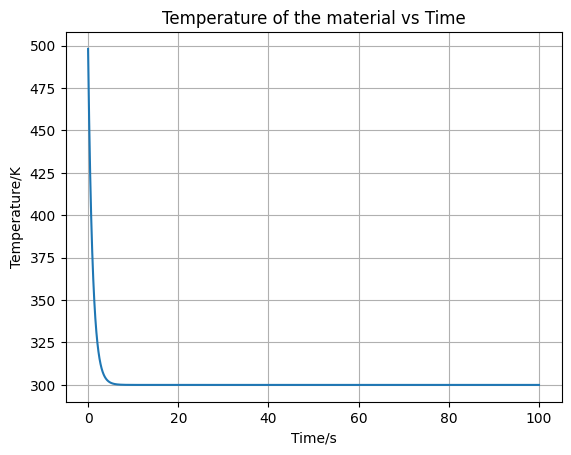

In [12]:
# Plot temperature versus time

plt.plot(time, temp_values)
plt.xlabel('Time/s')
plt.ylabel('Temperature/K')
plt.title('Temperature of the material vs Time')
plt.grid(True)
plt.show()


# A graph of temperature vs heat input

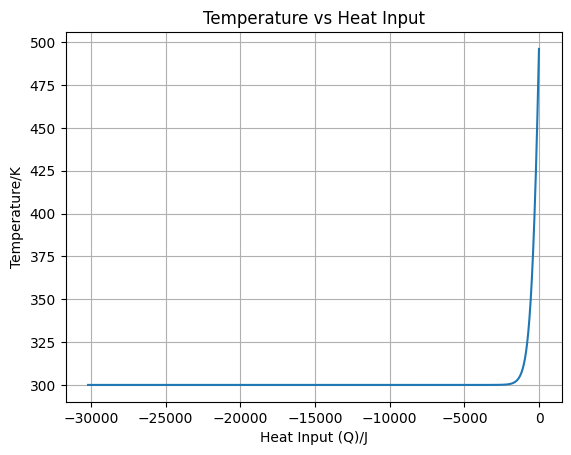

In [13]:
# Plot temperature versus heat input
plt.plot(heat_input, temp_values[1:])
plt.xlabel('Heat Input (Q)/J')
plt.ylabel('Temperature/K')
plt.title('Temperature vs Heat Input')
plt.grid(True)
plt.show()